<a href="https://colab.research.google.com/github/garestrear/introduccion_ML_cursoUN/blob/main/Sesion6_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

________________
# <center> **Sesión 6: Modelos de Regresión** </center>
________________

# **1. Modelos de Regresión**
En los modelos de aprendizaje supervisado se encuentra el modelo de Regresión. Los objetivos de este curso son entender

*   Entender lo básico de modelos de regresión
*   Aplicar modelos de regresión a un conjunto de datos

Comenzaremos con
Regresión Multiple:
> *   Regresión lineal multiple 
> *   Regresión no lineal multiple

Algunos algoritmos en regresión son :
* Regresión Logística
*   Regresión Poisson
*   Regresión lineal bayesiana
* Regresión LASSO
* Regresión Ridge
* Regresión Elastic Net
* Regresión LARS 

# **Pasos a seguir**
En esta guía, seguiremos los siguientes pasos:

* Paso 1: carga de las librerias y los módulos necesarios.

* Paso 2: cargar los datos y realizar comprobaciones básicas de datos.

* Paso 3: creación de matrices para las características y la variable de respuesta.

* Paso 4: creación de los conjuntos de datos de entrenamiento y prueba.

* Paso 5: construir, predecir y evaluar el modelo de regresión. 



**1. Modelo de regresión**
*   Un modelo de regresión **lineal** es usado para determinar la relación entre una variable aleatoria $Y$ dependiente y las variables aleatorias independientes $X_i$ (también conocidas como variables explicativas) y un término aleatorio $\epsilon$. Este modelo puede ser expresado como

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_n X_n + \epsilon$$

donde los $\beta_0, \beta_1, \ldots, \beta_n$ son parámetros

*   Además es **no lineal** si el modelo puede expresarse como 

$$ Y = f(X, \beta)+ \epsilon $$

donde $X=(X_1, X_2, \ldots, X_n)$, $\beta= (\beta_0,\beta_1, \beta_2, \ldots, \beta_n)$ y $f$ es una función no lineal

Los modelos anteriores son **simple** si $n=1$ y **multiple** si $n \geq 2$.


En el caso mas simple la distribución de la variable dependinte $Y$ es normal

$$ Y \sim N(\mu,\sigma^2)$$

donde el valor esperado $\mu$ depende de las variables explicativas y un vector de parámetros desconocidos $\beta$

$$\mu_t =h (x_{1},\ldots,x_{n};\beta). $$

En el modelo de regresión lineal se tiene que 

$$h(x_{1},\ldots,x_{n};\beta) = \beta_0+\beta_1X_{1}+ \ldots + \beta_q X_{n}. $$

Es decir

$$ E(Y\vert X_1,\ldots,X_q)=h(X_1,\ldots, X_q;\beta).$$

**Correlación multiple de Pearson**

Sabemos que el coeficiente de correlación de Pearson de dos variables aletorias es una medida de dependencia lineal y se calcula como 

$${\displaystyle \rho _{X,Y}={\sigma _{XY} \over \sigma _{X}\sigma _{Y}}={E[(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}},} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} $$

y de forma muestral se obtiene con 

$$r_{X,Y} = \frac{n \sum x_i y_i- \sum x_i y_i}{\sqrt{n \sum x_i^2 -(\sum x_i )^2}\sqrt{n\sum y_i^2 -(\sum y_i)^2}} .$$

Finalmente, en una regresión lineal multiple podemos considerar el coeficiente de correlación multiple de Pearson $R$ como 

$$ R^2 = c ^T R_{XX}^{-1} c ,$$

donde $c= (r_{X_1Y}, r_{X_2Y}, \ldots, r_{X_nY})$ y $R_{XX}$ es la matriz de correlación

$$ R_{XX} = \left( \begin{matrix}
r_{X_1X_1} & r_{X_1X_2} & \ldots r_{X_1X_n}\\
r_{X_2X_1} &  \ldots    &  r_{X_2X_n} \\
\vdots     &  \ddots          &  \vdots \\
r_{X_nX_1} & \ldots     & r_{X_nX_n}
\end{matrix}\right) $$

esta correlación considera que hay intersección.


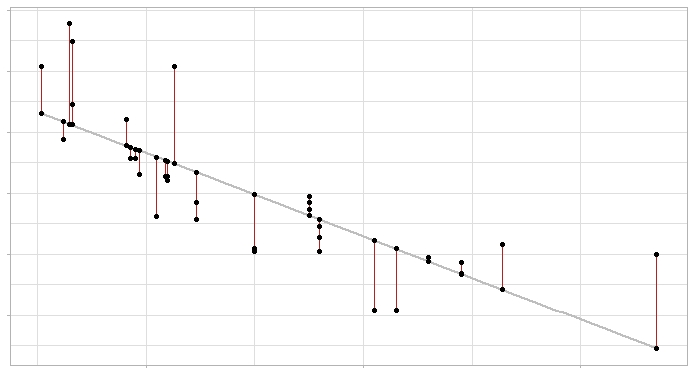

# **2. Regresión lineal multiple**
Bajo los siguientes supuestos:

* Linealidad: la relación entre las variables dependientes e independientes debe ser lineal.
* Homoscedasticidad: Debe mantenerse la varianza constante de los errores.
* Normalidad multivariante: la regresión múltiple asume que los residuos se distribuyen normalmente.
* Falta de multicolinealidad: se supone que hay poca o ninguna multicolinealidad en los datos.

Se puede considerar un modelo de regresión lineal. Ahora, las observaciones de la variable respuesta se agrupan en el vector columna $y=(y_1,\ldots,y_m)'$ y las observaciones de la variable explicativa en la siguiente matriz de dimensión $m \times n+1$ (llamada matriz de diseño) en el modelo de regresión lineal multiple. Sea  

$$X= \begin{bmatrix}
1 & x_{11} & \ldots & x_{1n} \\
1 & x_{21} & \ldots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & \ldots & x_{mn}
\end{bmatrix}. $$

Sea $\beta=(\beta_0,\beta_1,\ldots,\beta_n)'$ el vector de parámetros desconocidos de la esperanza condicional, si tenemos regresión lineal simple este vector columna es de dimensión $n+1$. Así, la verosimilitud anterior se puede reescribir de la siguiente forma

$$L(\beta,\sigma;y,X) = \left( \frac{1}{\sigma^2} \right)^{n/2} \exp \left[ -\frac{1}{2\sigma^2}(y-X\beta)'(y-X\beta)\right],$$ 

cuando se busca maximizar la verosimilitud realmente se busca mínimizar el error de mínimos cuadrados

$$ (y-X\beta)'(y-X\beta) = \sum_{i=1}^m \left(y_i- \beta_0 - \sum_{j=1}^n \beta_j x_{ij} \right)^2$$

que al usar algún método de optimización obtenemos los estimadores 

$$ \hat{\beta}= \left( \begin{array}{c}
     \hat{\beta}_0  \\
     \vdots \\
     \hat{\beta}_n 
\end{array} \right)= (X'X)^{-1}X'y ,$$

y con la verosimilitud se obtiene el estimador de $\sigma^2$ que depende del vector $\hat{\beta}$

$$ \hat{\sigma}^2 = \hat{\sigma}^2(\hat{\beta})= \frac{(y-X\hat{\beta})'(y-X\hat{\beta})}{n}.$$

A continuación se presentan las distrubuciones más comunes para la variable respuesta $Y$ y el tipo de modelo de regresión usual.

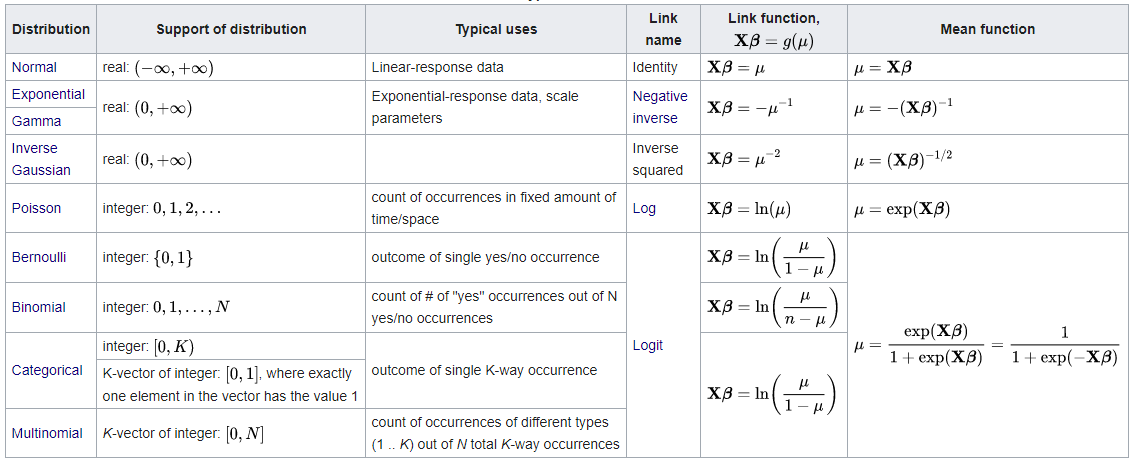

In [ ]:
# Librerias que vamos a utilizar
import pandas as pd
import io
import requests

import numpy as  np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,LassoCV
#Otra forma de hacer regresión
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Ejemplo**

Primero que hacemos con variables categóricas en una base de datos, por ejemplo la siguiente contiene las siguientes variables  

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

La base de datos se puede obtener en: https://archive.ics.uci.edu/ml/datasets/Automobile


Vamos a importar el Dataframe con Pandas 

In [ ]:
col_name = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-w8","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",	"horsepower","peak-rpm","city-mpg",	"highway-mpg","price"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
s=requests.get(url).content
dt=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",", names=col_name)

dt.head()


In [ ]:
#Tipos de datos
dt.dtypes

In [ ]:
# make, como algunas otras, es una variable aleatoria categórica nominal, entonces se cambia
datosc = pd.get_dummies(dt, columns = ["make","fuel-type","drive-wheels"], drop_first = True)
datosc.head()

Lo anterior se hace para tener mayor independencia en las variables explicativas.

**Ejemplo de Regresión Lineal Multiple**

Vamos a utilizar la siguiente base de datos que está disponible en: https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

Tenemo 6 descriptores moleculares y 1 respuesta experimental cuantitativa:
1.   CIC0
2.   SM1_Dz(Z)
3.   GATS1i
4.   NdsCH
5.   NdssC
6.   MLOGP
7.  quantitative response, LC50 [-LOG(mol/L)]

Se predecir la toxicidad acuática aguda hacia el pez Pimephales promelas (pececillo de cabeza gorda) en un conjunto de 908 sustancias químicas. Los datos de LC50, que es la concentración que causa la muerte en el 50% de los peces de prueba durante una duración de prueba de 96 horas, se utilizaron como respuesta del modelo. El modelo comprendía 6 descriptores moleculares: MLOGP (propiedades moleculares), CIC0 (índices de información), GATS1i (autocorrelaciones 2D), NdssC (recuentos de tipos de átomos), NdsCH (recuentos de tipos de átomos), SM1_Dz (Z) (matrices 2D basadas en descriptores).




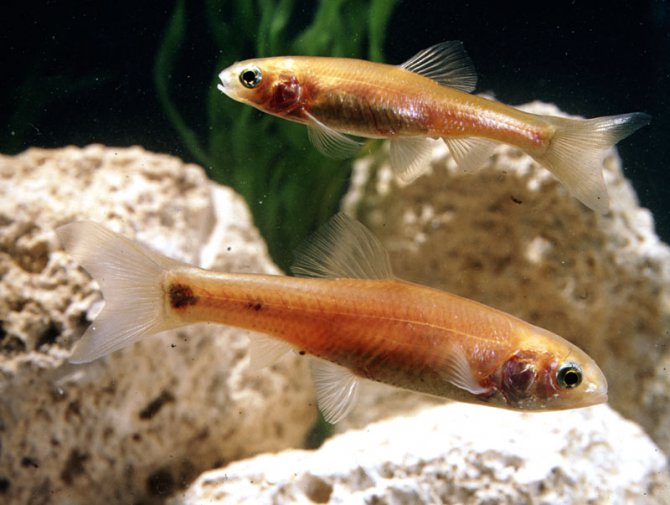

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv"

s=requests.get(url).content
col_name = ["CIC0","SM1_Dz(Z)","GATS1i","NdsCH","NdssC","MLOGP","LC50"]
dt=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=";", names=col_name)
dt.head()

Un primer análisis es una visualización de los datos

In [ ]:
scatter_matrix(dt, figsize=(9, 9), diagonal="hist")
plt.show()

También se tiene que hacer un análisis sobre la correlación entre las variables

In [ ]:
RXY = dt.corr()
print(RXY)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(RXY,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dt.columns[:]),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dt.columns)
ax.set_yticklabels(dt.columns)
plt.show()


Asignamos la matriz de diseño y la variable respuesta en el análisis de regresión.

In [ ]:
#Eliminamos las columnas
X = dt.drop("LC50", axis=1)
y = dt["LC50"]

Siguiendo los pasos de la guia, ahora tenemos que asignar los datos para entrenamiento y para poner a prueba el modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size   = 0.85, 
                                        random_state = 4, shuffle = True)

Finalmente encontramos los coeficientes para la regresión lineal multiple

In [ ]:
# Para considerar un tenemos que usar lo siguiente
X_train_con_int = sm.add_constant(X_train)
X_test_con_int = sm.add_constant(X_test)

mod1 = sm.OLS(y_train,X_train_con_int).fit()
print(mod1.summary())


In [ ]:
# Podemos ver los métodos del objetod mod
#dir(mod1)

#Podemos obtener el estimador de la varianza como
#print(mod1.scale)

*   Ahora bien, debemos hacer un análisis estadístico para determinar si el modelo es robusto. La prueba de hipótesis para las pruebas de regresión:

$$\begin{array}
     \mbox{H}_0 &: & \beta_1 = \ldots = \beta_n =0  \\
     H_1 &: &\beta_j \neq 0 \mbox{ para algún }j = 1, \ldots, n
\end{array} $$

usando el estadístico

$$ F^* = \frac{\sum_{i=1}^m (\hat{y_i}-\bar{y})^2/n}{\sum_{i=1}^m (y_i - \hat{y_i})^2/(m-(n+1))}= \frac{R^2 /n}{(1-R^2)/(m-(n+1))}$$

donde $\bar{y}$ representa el promedio de la muestra $y_1, y_2, \ldots, y_m$ y 

$$\hat{y_i} = \hat{\beta_0}+ \hat{\beta_1} x_{i1} + \ldots + \hat{\beta_n} x_{in}.$$ 

Así $F$ tiene un distribución $F$ de Fisher con $n$ y $m-(n+1)$ grados de libertad. Con lo anterior se puede obtener un p-valor  
*   Además se puede hacer la prueba para un sólo parámetro $j$:

$$\begin{array}
     \mbox{H}_0 &: &\beta_j = 0  \\
     H_1 &: &\beta_j \neq 0 
\end{array} $$

usando el estadístico

$$ T^* = \frac{\hat{\beta_j}}{se(\hat{\beta_j})}$$

donde $se(\hat{\beta_j})$ es el error estándar del coeficiente que se obtiene como la raiz cuadrada de la varianza muestral del parámetro, donde 

$$Var(\hat{\beta_j})= [\hat{\sigma}^2(X'X)^{-1}]_{jj}$$

y $X$ es la matriz de diseño. Aquí el estadístico $T^*$ se distribuye como T de Student con $m-(n+1)$ grados de libertad. Por lo tanto podemos obtener un p-valor asociado. 








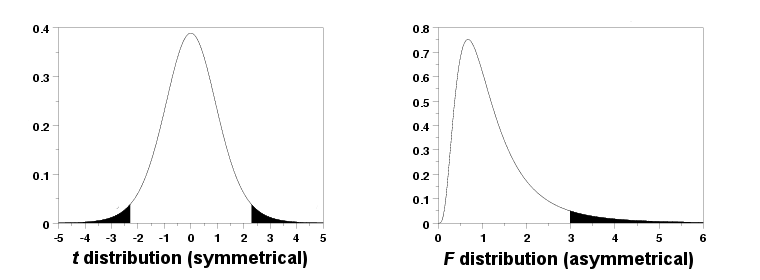

Para poner a prueba el modelo podemos obtener el error cuadrático medio como 
$$ MSE(y,\hat{y}) = \frac{1}{m} \sum_{i=0}^{m-1} (y_i-\hat{y}_i)^2 $$


In [ ]:
predicciones = mod1.predict(exog = X_test_con_int)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print("El error cuadrático medio del test es: ", mse)

Podemos ver que hay un predictor no significativo al describir la variable respuesta. A continuación vamos a repetir el modelo sin considerar las variables independientes no significativas.

In [ ]:
pvalues = np.zeros(X_train_con_int.shape[1])
for i in range(X_train_con_int.shape[1]):
    pvalues[i] = mod1.pvalues[i]

X_train_con_int2 = X_train_con_int.drop(X_train_con_int.columns[np.where(pvalues>0.05)],axis=1)

y volvemos a realizar la estimación de los parámetros


In [ ]:
mod2 = sm.OLS(y_train,X_train_con_int2).fit()
print(mod2.summary())

Finalmente obtenemos el error cuadrático medio

In [ ]:
X_test_con_int2 = X_test_con_int[X_train_con_int2.columns]
predicciones = mod2.predict(exog = X_test_con_int2)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print("El error cuadrático medio del test es: ", mse)

Ahora queremos saber que pasa al quitar el intercepto 

In [ ]:
mod3 = sm.OLS(y_train,X_train).fit()
print(mod3.summary())

Obtenemos el error cuadrático medio

In [ ]:
#Error cuadrático medio
predicciones = mod3.predict(exog = X_test)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print("El error cuadrático medio del test es: ", mse)

Quitamos las variables que no son explicativas para la variable respuesta

In [ ]:
pvalues = np.zeros(X_train.shape[1])
for i in range(X_train.shape[1]):
    pvalues[i] = mod3.pvalues[i]

X_train4 = X_train.drop(X_train.columns[np.where(pvalues>0.02)],axis=1)

mod4 = sm.OLS(y_train,X_train4).fit()
print(mod4.summary())

y así obtenemos el error cuadrático medio

In [ ]:
X_test4 = X_test[X_train4.columns]
predicciones = mod4.predict(X_test4)
mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print("El error cuadrático medio del test es: ", mse)

Finalmente, si queremos inferir la media de la variable aleatoria LC50 en algún valor X para algún modelo basta usar lo siguiente

In [ ]:
X_nuevo = pd.DataFrame([[1,4.213,0.786,0.983,1,1.553],[1,5.678,0.916,0.563,0,1.567]])

a = mod2.predict(X_nuevo)
print(a)

## **Regresión logística**

La **regresión logística** es un modelo que se compone de $n$ predictores ($x_n$) y variable de respuesta $Y$ (Bernoulli en este ejemplo, donde $P(Y=1)=p$). Se asume que hay una relación lineal entre los predictores y la "log-probabilidad" del evento $Y=1$. Es decir;

$${\displaystyle \ln{\left( \frac {p}{1-p} \right)}=\beta _{0}+\beta _{1}x_{1}+...+\beta _{n}x_{n}} = \beta\cdot X.$$

De lo cual se obtiene que:
$${\displaystyle p={\frac {e^{\beta _{0}+\beta _{1}x_{1}+...+\beta _{n}x_{n}}}{e^{\beta _{0}+\beta _{1}x_{1}+...+\beta _{n}x_{n}}+1}}={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x_{1}+...+\beta _{n}x_{n})}}}}.$$



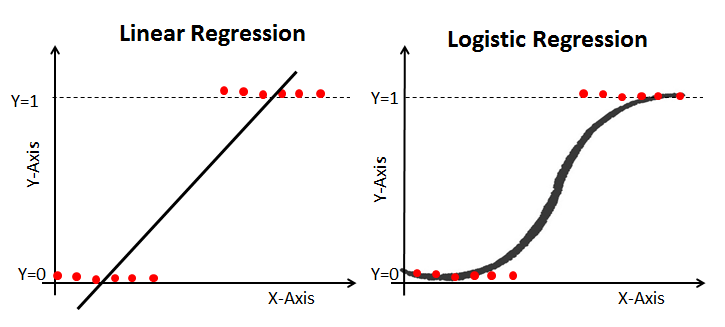

En el siguiente modelo $x$ son las horas de estudio de un alumno y $y$ es si aprobó o no el examen. 

In [ ]:
hr_estudio=np.array([0.50,	0.75,	1.00,	1.25,	1.50,	1.75,	1.75,	2.00,	2.25,	2.50,	2.75,	3.00,	3.25,	3.50,	4.00,	4.25,	4.50,	4.75,	5.00,	5.50,5.9])
y=np.array([0, 0,	0,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1, 1])

print(np.corrcoef(hr_estudio,y))


En Python `sklearn.linear_model` agrega de forma automatica una penalización en $l_2$ por defecto. Para evitar lo anterior utilizar C grande (por ejemplo C=1e12).

In [ ]:
hr_estudio = hr_estudio.reshape(-1,1)

model = LogisticRegression(C=1e12)
regre=model.fit(hr_estudio,y)

print(regre.intercept_) 
print(regre.coef_)   

In [ ]:
x_test=np.arange(7).reshape(7,1)
print(x_test)
model.predict_proba(x_test)

In [ ]:
x = np.linspace(0,6,1000).reshape(-1,1)
x1 = model.predict_proba(x)[:,1]

#Para hacer alguna clasificación
#x1 = model.predict(x)

plt.plot(x,x1)
plt.scatter(hr_estudio,y)
plt.show()

# **Regresión LASSO**

En Estadística y Aprendizaje Automático, Lasso (least absolute shrinkage and selection operator, por sus siglas en inglés), es un método de análisis de regresión que realiza selección de variables y regularización para mejorar la exactitud e interpretabilidad del modelo estadístico producido por este.

El objetivo del Lasso es resolver

$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}1_{N}-X\beta \right\|_{2}^{2}\right\}{\text{ con }}\|\beta \|_{1}\leq t.}$$

Aquí $t$ es un parámetro libre preespecificado que determina la cantidad de regularización. Generalmente se normaliza para que la solución no depende de la escala de medida. Otra forma de verlo es

$${\displaystyle \min _{\beta \in \mathbb {R} ^{n+1}}\left\{  \sum_{i = 1}^m \left( y_i -  ( \beta_0 + \sum_{j = 1}^n \beta_j x_{ij} ) \right)^2 + \alpha  \sum_{j=1}^{n+1} \vert \beta_j \vert   \right\}}$$

Ahora implementaremos el algoritmo de regresión Lasso para la base de datos anterior. Para el parámetro $\alpha$ se considera


*   $\alpha = 0$: algunos coeficientes de una regresión lineal simple
* $\alpha = \infty$: Todos los coeficietes cero
* $0 < \alpha < \infty$: coeficientes entre 0 y los de una regresión lineal simple



Para este ejemplo utilizamos los datos del ejemplo anterior.

In [ ]:
X = dt.drop("LC50", axis=1)
y = dt["LC50"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size   = 0.85, 
                                        random_state = 4, shuffle = True)

In [ ]:
modelo = LassoCV(
            alphas          = np.linspace(0,2,500),
            normalize       = True,
            cv              = 10,
            fit_intercept   = True
         )
modelo.fit(X = X_train, y = y_train)






1.   ¿Qué pasa cuando cambiamos el valor de $\alpha$?
2.   ¿Cómo encontramos el $\alpha$ obtimo?



In [ ]:
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=True, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

Podemos ver como se hace cero los coeficientes de los predictores al hacer más grande el valor de $\alpha$. 

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=True, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

Tenemos que buscar el valor de $\alpha$ optimo 

In [ ]:
mse_cv = modelo.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el óptimo 
optimo       = modelo.alphas_[np.argmin(rmse_cv)]


print(f"Mejor valor de alpha encontrado: {optimo}")

Con ese valor de $\alpha$ podemos adaptar el modelo.

In [ ]:
modelo = Lasso(alpha = 0, fit_intercept=True, normalize=True)
modelo.fit(X = X_train, y = y_train)

Y finalmente se obtienen los valores de los coeficientes 

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': np.append("Intercept",X_train.columns),
                         'coef': np.append(modelo.intercept_,modelo.coef_)})

# Predictores incluidos en el modelo (coeficiente != 0)
print(df_coeficientes)

y obteniendo un error cuadrático medio de:



In [ ]:
predicciones = modelo.predict(X_test)
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")

Otro tipo de regresión es la **Ridge**: Igual que la anterior buscamos mínimizar 

$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}} $$

pero depende de  ${\displaystyle \|\beta \|_{2}^{2}\leq t}$. El beneficio en dicho modelo puede ser explicado en la siguiente imagen.

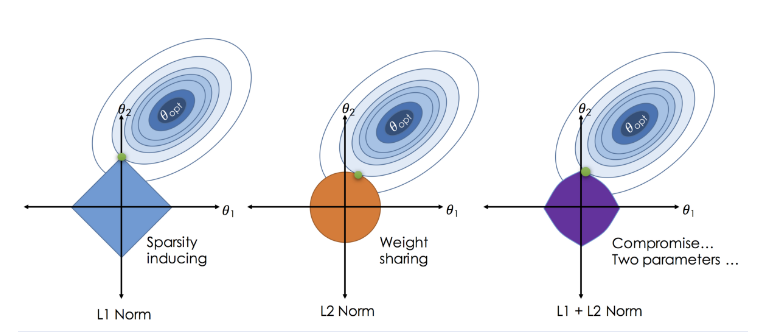

Es importante entender que cuando se sospecha que algunas variables predictoras no son explicativas para la variable respuesta es importante usar regresión LASSO y en caso contrario regresión Ridge. 

# **Regresión No Lineal**

Considere los siguientes datos

In [ ]:
np.random.seed(10)
x = np.array([i*np.pi/180 for i in range(60,300,4)]) 
y = np.sin(x) + np.random.normal(0,0.15,len(x))
plt.scatter(x,y)
plt.show()

In [ ]:
grado = 5
trans = PolynomialFeatures(degree=grado, include_bias=False)
x0 = x.reshape(-1,1)
X = pd.DataFrame(trans.fit_transform(x0))
print(X.head())

In [ ]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X,y)
print(linreg.coef_)

#Otra forma de hacerlo
#linreg2 = sm.OLS(y,X).fit()
#print(linreg2.summary())

Con lo anterior obtenemos algo de la forma 

$$ p(x) = \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4  + \beta_5 x^5$$

para la inferencia, así podemos obtener una predicción en nuevos valores de $x$.

In [ ]:
x1 = np.linspace(1.1,5.1,50).reshape(-1,1)

X1 = pd.DataFrame(trans.fit_transform(x1))
print(X1.head())


In [ ]:
y1 = linreg.predict(X1)
plt.figure(figsize = (8,5))
plt.plot(x1,y1)
plt.scatter(x,y)
plt.title('Inferencia con polinomio de grado {}'.format(grado))
plt.show()

¿Qué grado de polinomio es útil? ¿Se puede tener overfitting?

# **Tarea:** 
1.  Realizar regresión Ridge a la misma base de datos y encontrar el error cuadrático medio. ¿Por qué es un mejor modelo?
2. Aplicar regresión logística a la base de datos de Vino tinto. ¿Cómo se distribuye la variable aleatoria dependiente "quality"?

In [ ]:
#Primer problema 
from sklearn.linear_model import Ridge, RidgeCV
#consultar: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


#Segundo problema
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

s=requests.get(url).content
datos_vino=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=";")
#consultar:  https://archive.ics.uci.edu/ml/datasets/Wine+Quality